In [1]:
#...Por Caroliny Suque...13/12/2021....LABTDF
from intersect import intersection
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import seaborn as sns
import natsort 

In [2]:
# Configurações de plotagem
plt.rcParams.update({
    'font.size': 14,
    
    'xtick.color': 'black', #color: 'white' porque a tela é preta
    'ytick.color': 'black',
    'axes.labelcolor': 'black',
    'axes.titlecolor': 'black',
    'axes.titlesize': 20,
    'figure.figsize': (25,10)
})

# Configurando para warnings do pandas não aparecerem
pd.options.mode.chained_assignment = None

# Ignorando Future Warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [7]:
# selecionar o nome do diretório que está localizado o arquivo, ele vai ler todos os arquivos txt da pasta
path = r'/home/caroliny/Documentos/datavale/Perfis desgastados/EFC-10-01-21/FAD-2020' 
os.chdir(path) 

df = []
  
for file in natsort.natsorted(os.listdir()):
    
    if file.endswith(".prw"): 
        file_path = f"{path}/{file}"
        perfil = pd.read_table(file_path,header=None,
                               index_col=None,skiprows=44,
                               skipfooter=7,delim_whitespace=True)
        df.append(perfil)

data = pd.concat(df, axis=1, ignore_index=True)

# se quiser ler um arquivo txt especifico apenas tire do for o 'data' e escreva o 'file_path'
# assim é preciso que o txt esteja na sua pasta onde está o codigo salvo

<ipython-input-7-a24f8e2d83f4>:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  perfil = pd.read_table(file_path,header=None,


In [8]:
#inicio = 2250 #km do design 3
inicio = 1125 #km outros
#inicio = 4500 #km ajustado
flange_height = []
flange_width = []
thread_maximum = []
x_thread_maximum = []
y_thread_maximum = []
th = []
xh = []
yh = []
thread_tape = []
kilometragem = []

tapeline = 0 # tapeline que para os perfis do simpack está no zero

gagepoint = 0.0269 - 0.010 # medida L3 que é do topo do friso para baixo

N = -0.02
O = 0.04

P = 0.00
Q = 0.05

km = 0
    
for col1,col2 in zip(range(0,len(data.columns),2),range(1,len(data.columns),2)):
    
    #profile = data.iloc[:,col1:col2]
    x_profile = data[col1]
    y_profile = data[col2]

#..............................................................................................

    y_tapeline = list(np.arange(min(y_profile),max(y_profile),0.001))
    x_tapeline = np.full(len(y_tapeline),tapeline)

    x_center,y_center = intersection(x_profile, y_profile, x_tapeline, y_tapeline)

    y_flangetop = max(y_profile)

    flange_height.append(y_flangetop - y_center[0])

#.............................................................................................
    
    y_gagepoint = y_flangetop - gagepoint
    
    x_l3 = list(np.arange(min(x_profile),max(x_profile),0.001)) 
    y_l3 = np.full(len(x_l3),y_gagepoint)
    
    x_width,y_width = intersection(x_profile, y_profile, x_l3, y_l3)

    flange_width.append(x_width.max() - x_width.min())
        
#............................................................................................
    
    x_original = data[data.columns[-2]]
    y_original = data[data.columns[-1]]

    if col1 == data.columns[-2]:
        thread_maximum.append(0)
        x_thread_maximum.append(0)
        y_thread_maximum.append(0)
    else:
        for i in np.arange(-0.02, 0.04, 0.001):
            y = list(np.arange(min(y_profile),max(y_profile),0.001)) 
            x = np.full(len(y),i)
    
            x_thp,y_thp = intersection(x_profile, y_profile, x, y)
            x_tho,y_tho = intersection(x_original, y_original, x, y)
        
            th.append(abs(y_tho - y_thp)[0])
            xh.append(i)
            yh.append(y_thp[0])
    
        thread_maximum.append(max(th))
        x_thread_maximum.append(xh[th.index(max(th))])
        y_thread_maximum.append(yh[th.index(max(th))])

#.............................................................................................

    x_i = tapeline

    y = list(np.arange(min(y_profile),max(y_profile),0.001)) 
    x = np.full(len(y),x_i)
    
    x_thp,y_thp = intersection(x_profile, y_profile, x, y)
    x_tho,y_tho = intersection(x_original, y_original, x, y)
    
    thread_tape.append((y_tho - y_thp)[0])
    
#...............................................................................................
    
    if col1 == data.columns[-2]:
        kilometragem.append(0)
        
    else:
        km = km + inicio
        kilometragem.append(km)
    

In [9]:
indice1 = pd.DataFrame(list(zip(flange_height,flange_width,thread_maximum,x_thread_maximum,y_thread_maximum,thread_tape, kilometragem)),
                      columns=['flange_height', 'flange_width', 'thread_maximum', 'x_thread_maximum','y_thread_maximum','thread_tape','kilometragem'])

In [11]:
indice1['thread_tape'] - indice['thread_tape']

0      1.551421e-07
1      1.438670e-07
2      8.460931e-08
3      8.513817e-08
4      1.010207e-07
           ...     
158    2.604775e-06
159    2.568363e-06
160    3.030529e-06
161    3.569555e-06
162    0.000000e+00
Name: thread_tape, Length: 163, dtype: float64

In [6]:
indice

,flange_height,flange_width,thread_maximum,x_thread_maximum,y_thread_maximum,thread_tape,kilometragem
0,0.026980,0.030410,0.000050,0.001,-0.000097,0.000048,1125
1,0.027016,0.030388,0.000092,0.002,-0.000190,0.000086,2250
2,0.027049,0.030360,0.000129,0.002,-0.000227,0.000119,3375
3,0.027079,0.030200,0.000162,0.002,-0.000261,0.000148,4500
4,0.027105,0.030150,0.000193,0.003,-0.000342,0.000175,5625
...,...,...,...,...,...,...,...
158,0.029839,0.030033,0.003198,0.009,-0.003646,0.002908,178875
159,0.029872,0.030033,0.003242,0.009,-0.003690,0.002941,180000
160,0.029909,0.030033,0.003286,0.009,-0.003734,0.002978,181125
161,0.029953,0.030033,0.003332,0.009,-0.003780,0.003022,182250


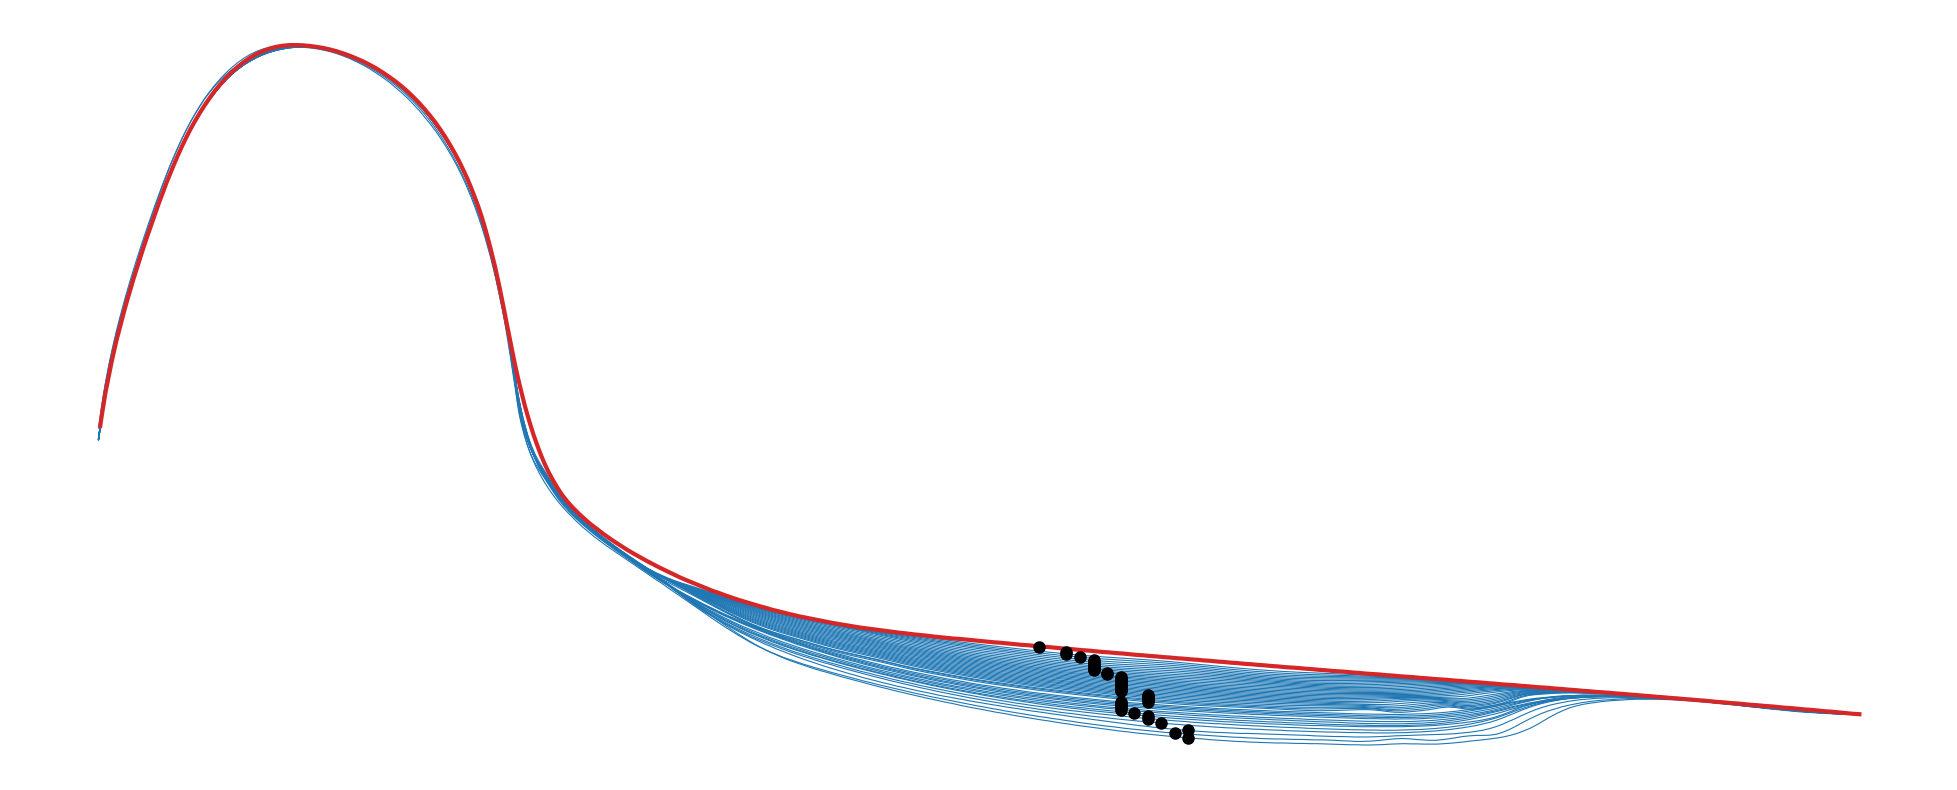

In [154]:
x_original = data[data.columns[-2]]
y_original = data[data.columns[-1]]

for col1,col2 in zip(range(0,len(data.columns)-2,2),range(3,len(data.columns)-2,2)):
    x_profile = data[col1]
    y_profile = data[col2]
    
    plt.plot(x_profile,y_profile,'-', color = 'tab:blue',lw =0.8)

plt.plot(x_original,y_original,'-', color = 'tab:red', lw = 3)
plt.plot(indice['x_thread_maximum'],indice['y_thread_maximum'],'ok',markersize=8) 

#plt.xlim(0.0069, 0.0071)
plt.axis('off')

plt.savefig("x_INT-2021.pdf")
plt.show()

In [155]:
indice.to_csv('Indice_INT-2021.csv')